# 2. Importing Required Libraries

In [40]:
# importing required libraries for the project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from google.colab import autoviz

# 3. Perform An Exploratory Data Analysis

In [41]:
# importing data from insurance.csv file using read_csv tool from pandas library
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Aygaz Makine Öğrenmesi Bootcamp/Project/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [42]:
# examining the distribution of Bmi (Body Mass Index)

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['bmi'], **{})
chart

In [43]:
# examining the relationship between “smoker” and “charges”

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df, *[[['smoker', 'charges']]], **{})
chart

In [44]:
# examining the relationship between “smoker” and “region”

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df, *['smoker', 'region'], **{})
chart

In [45]:
# examining the relationship between “bmi” and “sex”.

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df, *['bmi', 'sex'], **{'inner': 'box'})
chart

In [46]:
# finding the region with the most children

region_child_counts = df.groupby('region')['children'].sum()

max_children_region = region_child_counts.idxmax()
max_children_count = region_child_counts[max_children_region]

print(f"The region with the most children is '{max_children_region}' with {max_children_count} children.")

The region with the most children is 'southeast' with 382 children.


In [47]:
# examining the relationship between “age” and “bmi”

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df, *[[['age', 'bmi']]], **{})
chart

In [48]:
# examining the relationship between “bmi” and “children”

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df, *[[['bmi', 'children']]], **{})
chart

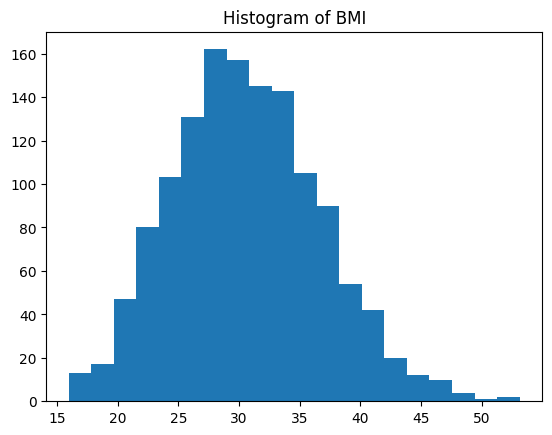

In [49]:
#

plt.hist(df['bmi'], bins=20)
plt.title('Histogram of BMI')
plt.show()

# Review: When we examine the bmi histogram below, we can see that there are no outliers in our data.

In [50]:
# examining the relationship between “bmi” and “charges”

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df, *[[['bmi', 'charges']]], **{})
chart

<Figure size 1000x600 with 0 Axes>

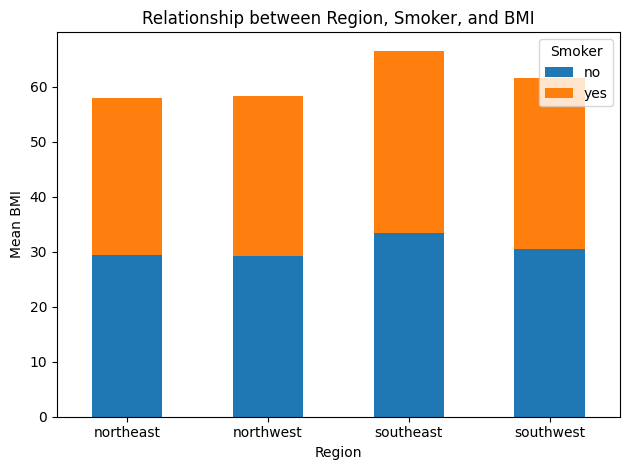

In [51]:
# examining the relationship between “region”, “smoker” and “bmi” using bar plot

plt.figure(figsize=(10, 6))
grouped_data = df.groupby(['region', 'smoker'])['bmi'].mean().reset_index()
pivot_data = grouped_data.pivot(index='region', columns='smoker', values='bmi')
pivot_data.plot(kind='bar', stacked=True)

plt.title('Relationship between Region, Smoker, and BMI')
plt.xlabel('Region')
plt.ylabel('Mean BMI')
plt.legend(title='Smoker')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# 4. Data Preprocessing

In [39]:
label_encoder = LabelEncoder()
df['charges'] = label_encoder.fit_transform(df['sex'])
print(df)

      age  sex     bmi  children smoker     region  charges
0      19    0  27.900         0    yes  southwest        0
1      18    1  33.770         1     no  southeast        1
2      28    1  33.000         3     no  southeast        1
3      33    1  22.705         0     no  northwest        1
4      32    1  28.880         0     no  northwest        1
...   ...  ...     ...       ...    ...        ...      ...
1333   50    1  30.970         3     no  northwest        1
1334   18    0  31.920         0     no  northeast        0
1335   18    0  36.850         0     no  southeast        0
1336   21    0  25.800         0     no  southwest        0
1337   61    0  29.070         0    yes  northwest        0

[1338 rows x 7 columns]
